# Chapter 2: Intro

## Set up basic neural net classifier

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print(train_images.shape)
print(train_labels)
print(test_images.shape)
print(test_labels)

(60000, 28, 28)
[5 0 4 ..., 5 6 8]
(10000, 28, 28)
[7 2 1 ..., 4 5 6]


In [4]:
# THE MODEL

# 1. feed network training data
# 2. teach networks to associate images and labels
# 3. see if network's predictions are correct

# Here is the general structure
#
# a) create sequential network (runs in sequence, not parallel)
# b) create network layers (specify size and activation function)
# c) define loss function
# d) define optimize (back prop)
# e) define metric to monitor training quality

from keras import models
# models specify the type of network. 
# Sequential makes sure that the model is not executed in parallel

from keras import layers
# a layer transforms input data to more 'useful' output data

# (a)
network = models.Sequential()
# (b)
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
# this model has 2 layers
# Dense means that the layers are fully connected
# last layer is 10-way softmax, which means it will return an array of 
# 10 probability scores (summing to 1)

# (c)
# (d)
# (e)
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [5]:
# PREPROCESS DATA

# a) reshape data to what network expects to get 
#   * initial data has shape (6000,28,28) => reshape => (6000,512)
# b) normalize data so all values are in [0,1] interval
#   * initial data has RGB values [0,255] => normalize [0,1]
# c) categorically encode the labels (see Chapter 3 for explanation)

# (a)
# (b)
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

# (c)

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
# TRAIN THE BEAST

# two quantities are displayed
# 1) the loss function value
# 2) the accuracy of the network on training data
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 13s 208us/step - loss: 0.2538 - acc: 0.9262
Epoch 2/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.1030 - acc: 0.9689
Epoch 3/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.0678 - acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.0488 - acc: 0.9848
Epoch 5/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.0380 - acc: 0.9888


In [7]:
# TRY IT ON TEST

# test accuracy is much lower 
# this is an example of OVERFITTING the training data

test_loss, test_acc = network.evaluate(test_images,test_labels)
print('test accuracy',test_acc)

10000/10000 [==============================] - 0s 44us/step
test accuracy 0.9786


# Fundamentals

## Tensors

Tensors defined by
1. Rank (number of axes)
2. Shape (tuple that described number of elements along each axis)
3. Data type (the data type of each element, such as float32 or char)

In [8]:
import numpy as np

# scalar (0D)
scalar = np.array(11)
print('scalar dimension',scalar.ndim)
print(scalar)

# vector (1D)
vec = np.array([1,5,3,2])
print('vector dimension',vec.ndim)
print(vec)

# matrix (2D)
mat = np.array([[1,5,3,2],
              [1,5,3,2],
              [1,5,3,2]])
print('matrix dimension',mat.ndim)
print(mat)

# and so on...

scalar dimension 0
11
vector dimension 1
[1 5 3 2]
matrix dimension 2
[[1 5 3 2]
 [1 5 3 2]
 [1 5 3 2]]


## Manipulating tensors in numpy

In [9]:
# re-read data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# selects 10-100 (100 not included) digits from data
s = train_images[10:100]
print(s.shape)

# generally you can select range along any access
# e.g. select 14 x 14 pixels in bottom right

s = train_images[:,14:,14:]
print(s.shape)

# negative indices are relative to end of axis
# thi example crops to center of image
s=train_images[:, 7:-7, 7:-7]
print(s.shape)


(90, 28, 28)
(60000, 14, 14)
(60000, 14, 14)


## Tensor operations

example: relu transformation 

output = relu(dot(W,input)+b)

1. dot product W . input
2. addition +
3. relu operation relu(x) = max(x,0)

In [10]:
# A) tensor addition from scratch

def naive_add(a,b):
    # a and b are 2D tensors
    assert len(a.shape) == 2
    assert a.shape == b.shape
    
    # don't overwrite original input
    a=a.copy()
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            a[i,j] += b[i,j]
    return a

# B) just use numpy 
# addition z = x + y
# relu z = np.maximum(z,0)

## Displaying images

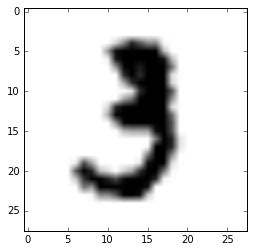

In [11]:

digit = train_images[10]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Chapter summary

 Learning means finding a combination of model parameters that mini- mizes a loss function for a given set of training data samples and their cor- responding targets.

 Learning happens by drawing random batches of data samples and their targets, and computing the gradient of the network parameters with respect to the loss on the batch. The network parameters are then moved a bit (the magnitude of the move is defined by the learning rate) in the opposite direction from the gradient.

 The entire learning process is made possible by the fact that neural net- works are chains of differentiable tensor operations, and thus it’s possible to apply the chain rule of derivation to find the gradient function map- ping the current parameters and current batch of data to a gradient value.

 Two key concepts you’ll see frequently in future chapters are loss and opti- mizers. These are the two things you need to define before you begin feed- ing data into a network.

 The loss is the quantity you’ll attempt to minimize during training, so it should represent a measure of success for the task you’re trying to solve.

 The optimizer specifies the exact way in which the gradient of the loss will be used to update parameters: for instance, it could be the RMSProp opti- mizer, SGD with momentum, and so on.